# Creating a Linear Regression Model Using the Tips Dataset, and predict Tips based on Total Bill

# Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

import joblib

print("Library loaded successfully")


Library loaded successfully


# Loading the Tips dataset

In [7]:
# Load tips dataset
tips = sns.load_dataset('tips')

# Exploring the data

In [8]:
print(tips.head())  # Show first few rows

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [9]:
print(tips.describe())  # to show the statistical summary

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [10]:
print(tips.info())  # to show Info about data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


# Selecting the features

In [11]:
# We're going to predict the tip based on the total_bill.
# features and Targets
X = tips[['total_bill']]  # input feature
y = tips['tip']           # target, i.e output


# Preparing Data for ML - Spliting the data into training and testing sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Creating and training the model

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array([3.04525623, 1.86330727, 3.55119456, 3.69452593, 2.31576375,
       2.83881627, 3.96728338, 2.26014262, 2.50615915, 2.57033737,
       2.88160176, 2.07723468, 2.06439904, 2.47407003, 2.00236009,
       2.91903905, 2.92652651, 3.23351235, 2.68478854, 5.33107064,
       3.13831465, 3.13403611, 2.4558862 , 1.94673896, 3.16077703,
       2.17564129, 2.02375283, 3.62927807, 2.68906708, 6.07767732,
       4.99734388, 1.75313465, 2.83025918, 3.09552917, 2.74040966,
       3.50092162, 2.21200895, 5.53644096, 2.33287794, 3.35010279,
       2.04942412, 2.47834858, 3.48701634, 2.03017065, 2.03124029,
       1.25361414, 2.05798121, 2.92438724, 1.73388118])

# Understanding the model

In [23]:
print("slope (x) [model]:", model.coef_[0])
print("intercept (y) [model]:", model.intercept_)

slope (x) [model]: 0.10696370685268666
intercept (y) [model]: 0.9252355585570546


# The Model Equation: Price = (Slope * Size) + Intercept, Y = mx + b

# Evaluating the model

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 0.57
Root Mean Squared Error: 0.75
R2 Score: 0.54


# Visualizing the results

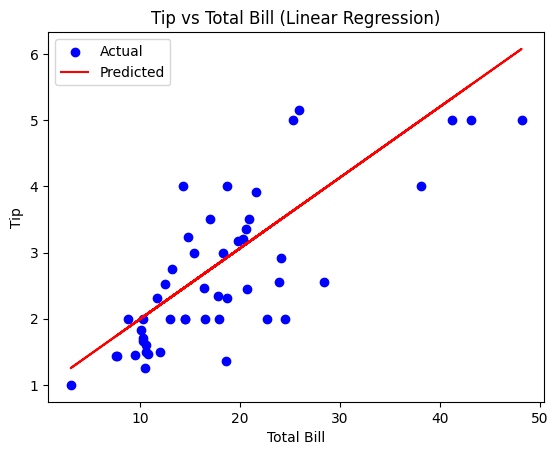

In [26]:
# Scatter plot of actual vs. predicted
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip vs Total Bill (Linear Regression)')
plt.legend()
plt.show()


# Saving Model

In [25]:
# Saving Model
joblib.dump([model], "tips")

['tips']

# Import and Using Model

In [31]:
loaded_model = joblib.load("tips")

In [32]:
print(tips.head)

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


# Predicting for a new total bill

In [19]:
# Let’s say a customer has a total bill of 45:
new_data = pd.DataFrame({'total_bill': [45]})
predicted_tip = model.predict(new_data)
print(f"Predicted Tip for $45 bill: {predicted_tip[0]:.2f}")


Predicted Tip for $45 bill: 5.74


In [20]:
# prediction foa a total bill of 50:
new_data = pd.DataFrame({'total_bill': [50]})
predicted_tip = model.predict(new_data)
print(f"Predicted Tip for $50 bill: {predicted_tip[0]:.2f}")

Predicted Tip for $50 bill: 6.27
